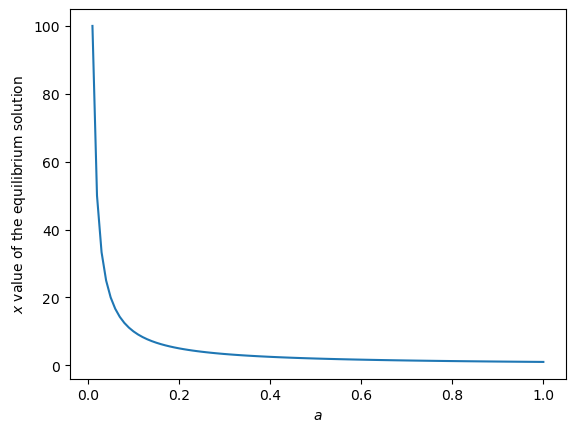

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.optimize import fsolve


N = 100+1


# Set up the values of alpha that we want to consider: [-1, 10]
a = np.linspace(0,1,N)[1:N]
N-=1

equil = np.zeros([N,2])

for i in range(N):
    equil[i] = [1/a[i], 2]

plt.plot(a,equil[:,0]);
plt.xlabel(r"$a$");
plt.ylabel(r"$x$ value of the equilibrium solution");

/tmp/ipykernel_861/2039819586.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i] = eigenval


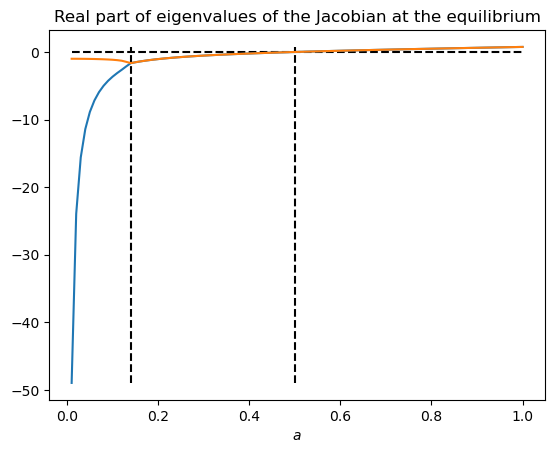

Bifurcation at a =  0.14
Bifurcation at a =  0.5


In [7]:
import cmath

# Construct the Jacobian at the equilibrium for each alpha
#
# J(i) gives the Jacobian matrix for alpha[i] and its corresponding equilibrium

J = lambda i: np.array([[a[i]*equil[i,1]-1,a[i]*equil[i,0]],[-equil[i,1]/2, 1-equil[i,0]/2]]);

# Create the array that is going to store the real part of the eigenvalues of the Jacobian

eig = np.zeros([N,len(J(0))])

eigenvalp=0

# Calculate the eigenvalues of the Jacobian
for i in range(N):
    eigenval = np.linalg.eigvals(J(i));
    if (isinstance(eigenval[0], complex) and not(isinstance(eigenvalp[0],complex))):
        ic_r = i
    eigenvalp=eigenval
    eig[i] = eigenval
    eig[i].sort()
    if (i>0):
        if (eig[i,1]*eig[i-1,1]<0):
            is_u = i
        if (eig[i,1]*eig[i-1,1]==0):
            is_u = i-1

# minimum = min(np.minimum(eig[:,0], eig[:,1]));
# maximum = max(np.maximum(eig[:,0], eig[:,1]));
minimum = min(eig[:,0])    # eig[:,0] contains the smallest eigenvalue
maximum = max(eig[:,1])    # eig[:,1] contains the largest eigenvalue

# Plot the eigenvalues of the Jacobian
plt.plot(a, np.zeros(N),'--k')
plt.plot([a[ic_r], a[ic_r]], [minimum,maximum], '--k')
plt.plot([a[is_u], a[is_u]], [minimum,maximum], '--k')
plt.plot(a, eig[:,0], a, eig[:,1])
plt.xlabel(r"$a$");
plt.title('Real part of eigenvalues of the Jacobian at the equilibrium');
#plt.yticks(np.arange(-2.5, 0.1, 0.5));
# plt.legend(["Real Eigenvalues", "Real part of complex eigenvalues"]);

plt.show()

print('Bifurcation at a = ', a[ic_r])
print('Bifurcation at a = ', a[is_u])